In [1]:
!pip install bitsandbytes accelerate peft -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 23.8 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/huggingface/diffusers.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

--2024-03-06 10:30:27--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81962 (80K) [text/plain]
Saving to: ‘train_dreambooth_lora_sdxl.py’

train_dreambooth_lo 100%[===================>]  80.04K  --.-KB/s    in 0.01s   

2024-03-06 10:30:27 (6.22 MB/s) - ‘train_dreambooth_lora_sdxl.py’ saved [81962/81962]



In [4]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, size=(512, 512)):
  """
  Resizes all images in a folder to the specified size and saves them in another folder.

  Args:
      input_folder: Path to the folder containing the images.
      output_folder: Path to the folder where the resized images will be saved.
      size: A tuple representing the target width and height (default: (512, 512)).
  """

  # Create the output folder if it doesn't exist
  os.makedirs(output_folder, exist_ok=True)

  for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
      # Construct full paths for input and output images
      input_path = os.path.join(input_folder, filename)
      output_path = os.path.join(output_folder, filename)

      try:
        # Open the image
        image = Image.open(input_path)

        # Resize the image
        resized_image = image.resize(size, Image.ANTIALIAS)  # Use antialiasing for better quality

        # Save the resized image
        resized_image.save(output_path)

        print(f"Image '{filename}' resized successfully.")
      except Exception as e:
        print(f"Error resizing '{filename}': {e}")

# Replace these with your actual folder paths
input_folder = "/content/sample_data/Images"
output_folder = "/content/sample_data/Image"

resize_images(input_folder, output_folder)

<ipython-input-4-fe231d7ffcff>:28: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)  # Use antialiasing for better quality


Image 'a04cae285c974b3a4a5f1225d9403938.png' resized successfully.
Image '617997b55d89d49c78ab80ab89357433.png' resized successfully.
Image '51d83739d2083992aa602d7c2b260bf4.png' resized successfully.
Image 'e0b394eab6c9400c255ed7c274148acd.png' resized successfully.
Image 'd5d8ecc3305658a85f30a7801f3401c3.png' resized successfully.
Image 'd42b6704045c4517747384c1a16bcd9e.png' resized successfully.
Image '73a2ca482fe18f9ed715657711df82b2.png' resized successfully.
Image 'c1cdfbfcd0a667d5366cb69233ba1b35.png' resized successfully.
Image 'aa24426f2a31ec8415c509d9fc12a3af.png' resized successfully.
Image 'c23214666b5ebdb2d3cd7d2e4084048c.png' resized successfully.


In [5]:
import matplotlib.pyplot as plt

In [ ]:
for filename in os.listdir(output_folder):
  path = os.path.join(output_folder, filename)
  image = plt.imread(path)
  plt.imshow(image)
  plt.title(filename)
  plt.show()

In [8]:
# width, height = img.size
# print(f"The image dimensions are: {width} pixels wide and {height} pixels high.")

The image dimensions are: 512 pixels wide and 512 pixels high.


In [6]:
!pip install transformers
import json

In [7]:
from transformers import pipeline
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

In [5]:
# for filename in os.listdir(output_folder):
#         # Check if it's an image file
#         if filename.endswith(".png"):
#             # Load the image
#             img_path = os.path.join(output_folder, filename)
#             img = Image.open(img_path)

#             # Generate caption
#             caption_prefix = "a photo of TOK cartoon "
#             caption = caption_prefix + pipe([img])[0][0]["generated_text"]
#             entry = {"file_name":os.path.basename(img_path), "prompt": caption}

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [6]:
# entry

{'file_name': 'aa24426f2a31ec8415c509d9fc12a3af.png',
 'prompt': 'a photo of TOK cartoon a cartoon character with a red banda and a black hat'}

In [8]:
with open("caps.json", "a") as file:
    for filename in os.listdir(output_folder):
        # Check if it's an image file
        if filename.endswith(".png"):
            # Load the image
            img_path = os.path.join(output_folder, filename)
            img = Image.open(img_path)

            # Generate caption
            caption_prefix = "a photo of TOK cartoon "
            caption = caption_prefix + pipe([img])[0][0]["generated_text"]
            entry = {"file_name":os.path.basename(img_path), "prompt": caption}
            json.dump(entry, file)
            file.write('\n')

print("Captions generated and stored in caps.json")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Captions generated and stored in caps.json


In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [10]:
from huggingface_hub import notebook_login
notebook_login()

In [12]:
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --pretrained_vae_model_name_or_path="madebyollin/sdxl-vae-fp16-fix" \
  --instance_data_dir="/content/sample_data/Image" \
  --output_dir="/content/sample_data/model_save" \
  --caption_column="prompt"\
  --mixed_precision="fp16" \
  --instance_prompt="a photo of TOK cartoon" \
  --train_batch_size=1 \
  --gradient_accumulation_steps=3 \
  --gradient_checkpointing \
  --learning_rate=1e-4 \
  --snr_gamma=5.0 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --max_train_steps=20 \
  --seed="0"

2024-03-06 10:35:56.066150: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 10:35:56.066198: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 10:35:56.067415: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 10:35:57.084668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/06/2024 10:35:58 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

You are using a model of type clip_text_model to instantiate a model of ty

In [16]:
repo_id = "/content/sample_data/model_save/pytorch_lora_weights.safetensors"

In [17]:
import torch
from diffusers import DiffusionPipeline, AutoencoderKL

vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    vae=vae,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
)
pipe.load_lora_weights(repo_id)
_ = pipe.to("cuda")

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

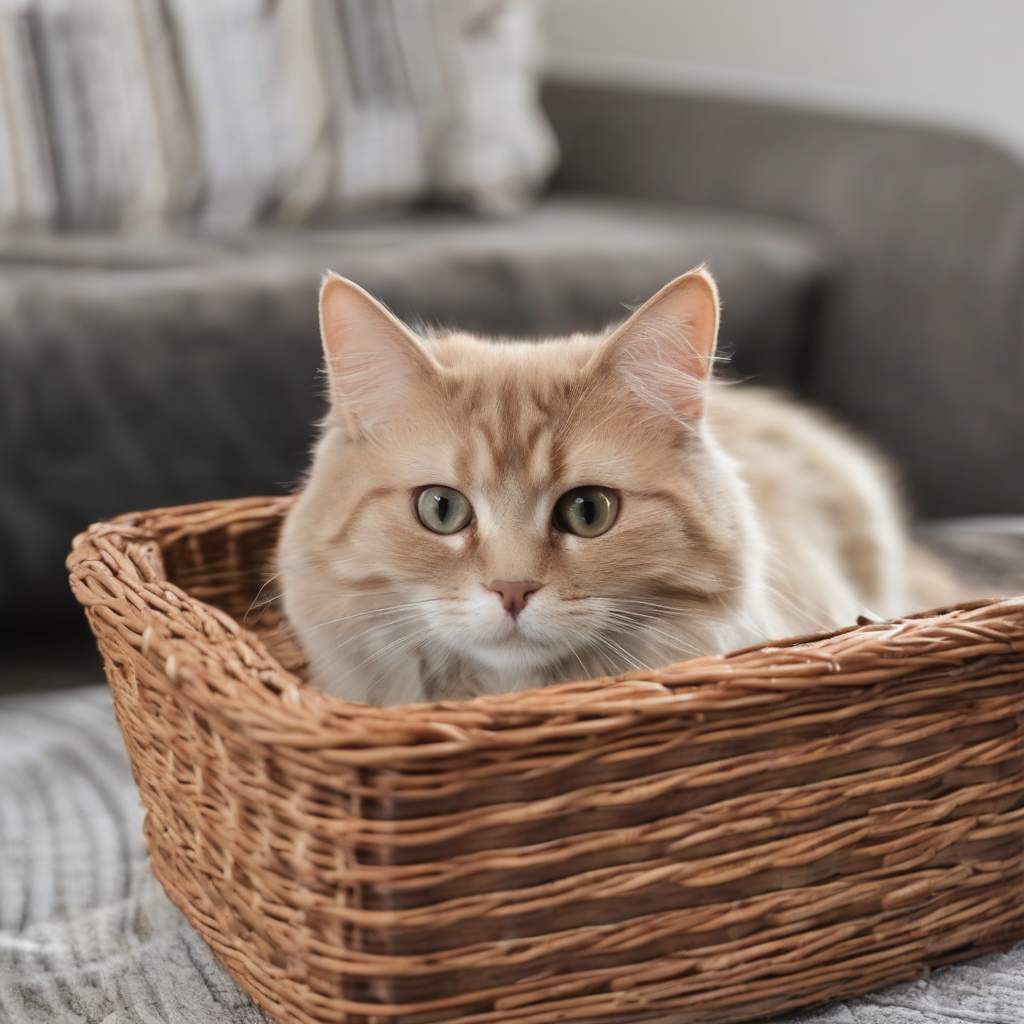

In [19]:
prompt = "a photo of cat in a basket"

image = pipe(prompt=prompt, num_inference_steps=25).images[0]
image